# NLP: AGNews analysis with Spacy



# **Summary**

Once this assignment was handed to us, the first thing we needed to do was to upload the relevant data to analyze. In order to do so, we created a first code, gathering all the libraries that we would need to run our code. Therefore, we would be able to quickly see all the libraries used.  

The next step would be to import the data and display it to check it was loaded correctly. We checked that the categories within the data were evenly distributed. This will help us avoid any kind of overfitting or problem in our models. Within our datasets, both the train and test, each category is represented by 25% of the data. Since we have four different categories, we thought it would be nice to have a first glimpse at the most popular words for each of the categories. We quickly saw the difference between categories. In Science topics, the most used words are `new`, `quot`, `company`, `Microsoft`, etc. In Sports, the most popular words are `AP`, `team`, `game` and `win`. In World topics, the most used words are `Minister`, `Prime`, `Monday`, `Wednesday`, etc. For your last topic, Business, the most used words are `New York`, `HREF`, `York`, `oil`, `price`, etc. As one can see, none of the topics shared one word, showing the huge variety of words and how these change depending on the topic. Therefore, this can give us a quick understanding of how the model will be able top identify the category for each of the texts. 

Once the data is loaded, a very important step is data cleaning and feature engineering. Since we only have 7 variable and neither of them can be combined or changed, the only thing we can do with the datasets is clean them. When displaying the texts, we quickly spotted an error. In the text there was a string like ` #39` where there should have been an `'`. Therefore, we decided to substitute it and modify out data. 

After all the cleaning was done, we started creating two  simple Naïve Bayes model. The first model is a multinomial model with accuracy score of 92%. The second model is able to do binary predictions and we will create one for each of the categories present in our data. The accuracy scores for each of the models are as follows: Science (92%), Sports (98%), World (94%) and Business (92%). These are very good metrics compared to the metrics of first multinomial model. We know there is still room for improvement since the recall is lower in most of the models. In order to improve our models and efficiently predict the category for any text, we will create  several Stochastic Gradient Descent models and fine-tune them. 



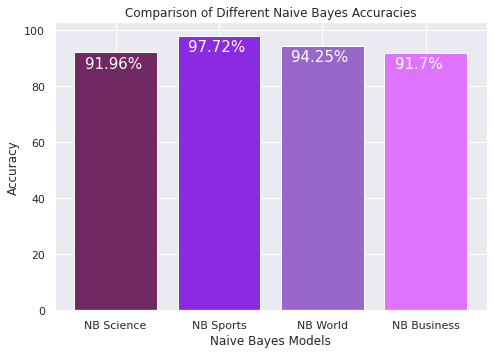

As we can see in the graph below, the SDG models could improve the accuracy for each category between 0.5 to 2 percentage points.

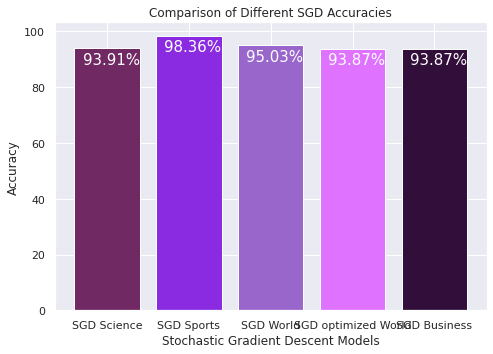

To tune the classifiers we first implemented sklearn’s GridSearchCV to the 4 different integers: Science, Sport, World, and Business. Primarily we built it using the base sklearn pipeline with `vect`, `tfidf` and `clf` defining the `sg_grid_estimator`. However to shorten computation time, the `clf` max iteration was reduced from 100 to 20. 

Then the sgd_grid_parameters were defined to configure the parameters of the thresholds. `Vect_ngram_range` was limited to 2 permutations with (1,1) and (1,2) and `clf_alpha` was reduced to 2 permutations (1e-3, and 1e-6) this was again used to simplify computational time. 

We then fit the sgd_grid to the best_estimator for each classifer and implemented the `threshold` function to display the precision ,recall and accuracy for the different classifiers depending on the metrics threshold. This threshold had a range of -2 to +2, displaying different metrics depending on the value of the threshold

Achieving True Precision or True Recall for a classifier comes at the expense of the Recall and Precision rate of the other classifiers. Taking into account the SGD NLP Model for the Science Integer for example: Putting the metrics with threshold -2 will change the Precision rate for the negative class to 1.00 and the Recall rate for the Positive class at 1.00.

The model thus has a Positive Class Recall rate of 1.00 however it comes at a cost of a low precision rate of 0.35.The same can be said for the other labels albeit at slightly different thresholds. 

The advantage of having Classifiers with True Precision is that it allows the model to be used in cases where the researcher wants certainty on the relevance of the Articles that are returned.

The advantage of having Classifiers with True Recall is that it allows the model to be used in cases where the researcher may not be concerned of the relevancy of the articles but at the span and scope of the articles in general. In cases such as in articles pertaining to “World Affairs” maybe the researcher would be interested in articles about Spain, but not necessarily just under the classifier “World” but also under “Science, Business and Sport”. 


A sanity check of the words/word combinations most associated with positive/negative sentiment revealed some interesting conclusions. 

Firstly, we noticed that names of news publishers are very often strongly associated with either a positive or negative sentiment. Thus, our model suggests that when news publishers post articles about certain subjects, they are often consistently negative or consistently positive about the topic.

Second, we noticed that terms with positive connotations often make logical sense (i.e. NASA is associated with positive science articles, olympics is associated with positive sports articles...). The terms associated with negative sentiments, however, often make less logical sense. Therefore, it seems that our model has a more difficult time determining which terms carry a negative connotation in a given context.

Finally, we also notice some very surprising results such as the fact that Enron -a company behind one of the biggest fraud scandals in recent history- carries a positive weight in our model or that military, Iraq and Palestine -words most people would associate with war and violence- also carry positive sentiment.

We also wanted to use the Spacy library for advanced Natural Language Processing. It helps create functions and models that ‘understand’ large volumes of text. This works by tokenizing (segmenting text into words, punctuations marks, etc. and later on analyzing the different characteristics of each element present in the text (labels, tags, entities, etc.). We will use this library to obtain more information about our dataset and find out how the texts in each category are structured. 
We will start by finding the tags for each of the words in the dataset. This way, we will be able to what tags are used in each of the categories and the difference between categories. As seen in the image below, while in most categories the use of NN (singular or mass noun) and NNP (proper singular noun) is pretty similar, we can see how texts in the Sports category use more NNP than NN. Overall, the use of nouns, conjunctions, determiners, and numbers in each of the categories is pretty much the same. All of them having the same distribution.


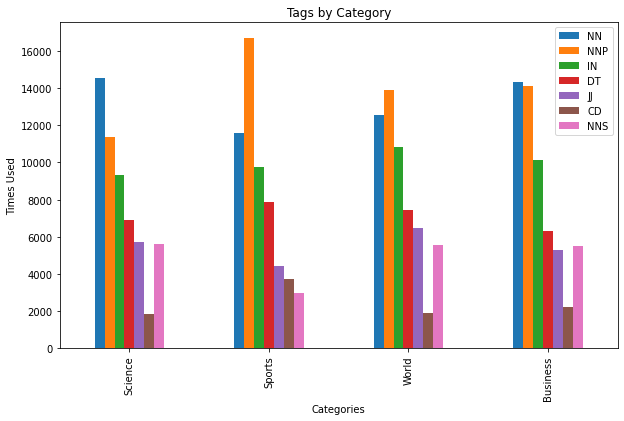

To further analyze the data, we also decided to find out the entities and labels. A named entity is a “real-world object” that is assigned a name – for example, a person, a country, a product or a book title. This is a more detailed information and will give us a very interesting insight of our dataset. To do so, we will find the Entity and Label in each sentence and append them together in a dictionary. We did this for each of the categories and calculated the number of entities found for each label. This resulted in the graphic below, showing the Entity-Label distribution for each category.

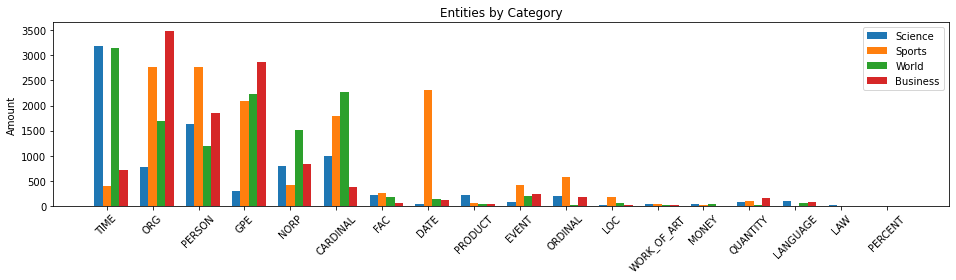

This graph perfectly shows which words each category uses, helping us understand what type of information each category contains. We would like to mention the three main differences that we found using this tool. Firstly, both the Science and World categories use way more words related to TIME, while the Sports and Business categories barely use. Secondly, Sports and Business categories use more words related to geopolitical entities such as countries, cities and states, while Science and World do not use them as much. Thirdly, there is one category that uses dates with a higher frequency than the other three, and that is Sports. This makes a lot of sense, since all texts related to sports need to have the date of the event and also the use of minutes and seconds to further explain details about matches or sport events. 

# **Libraries**

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np

# plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# WordCloud
from wordcloud import WordCloud

# Learning Models
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Spacy
import spacy
from tqdm import tqdm

# Import Data

In [ ]:
train = pd.read_csv('./agnews_train.csv', delimiter = ',')
test = pd.read_csv('./agnews_test.csv', delimiter = ',')

In [ ]:
display(train[:10])

text  ... business_int
0  John Souza, a volunteer with the Boone County ...  ...          1.0
1  Spain needs only to beat an under-strength Fre...  ...          0.0
2  PANAMA CITY, Panama -- When the United States ...  ...          0.0
3  Gilbert Arenas, Jarvis Hayes and Anthony Peele...  ...          0.0
4  MEMPHIS, Tenn. -- Kobe Bryant had his worst sh...  ...          0.0
5  Delta Air Lines #39; decision to close its hub...  ...          1.0
6  An Anne Arundel County judge Wednesday  reject...  ...          0.0
7  JAKARTA A militant Muslim cleric was charged W...  ...          0.0
8  There #39;s a reason that smiling Salvation Ar...  ...          1.0
9  A Palestinian rocket hit an Israeli town near ...  ...          0.0

[10 rows x 7 columns]

In [ ]:
train.describe()

label_int   science_int    sports_int     world_int  business_int
count  58949.000000  58949.000000  58949.000000  58949.000000  58949.000000
mean       1.499635      0.251098      0.249606      0.247858      0.251438
std        1.120309      0.433649      0.432788      0.431773      0.433843
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        1.000000      0.000000      0.000000      0.000000      0.000000
75%        3.000000      1.000000      0.000000      0.000000      1.000000
max        3.000000      1.000000      1.000000      1.000000      1.000000

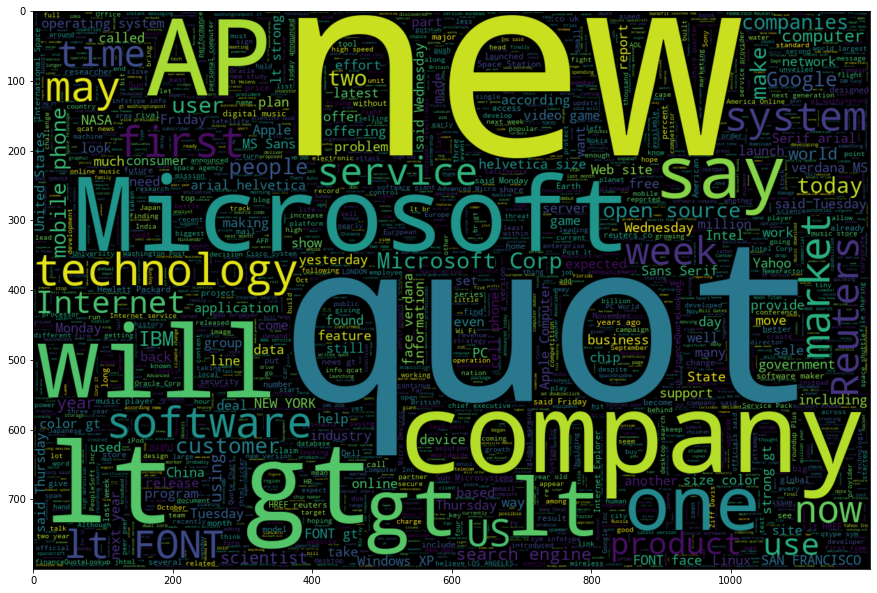

In [ ]:
#Wordcloud for Science
sci = train.text[train.label_int[train.label_int==0].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear')

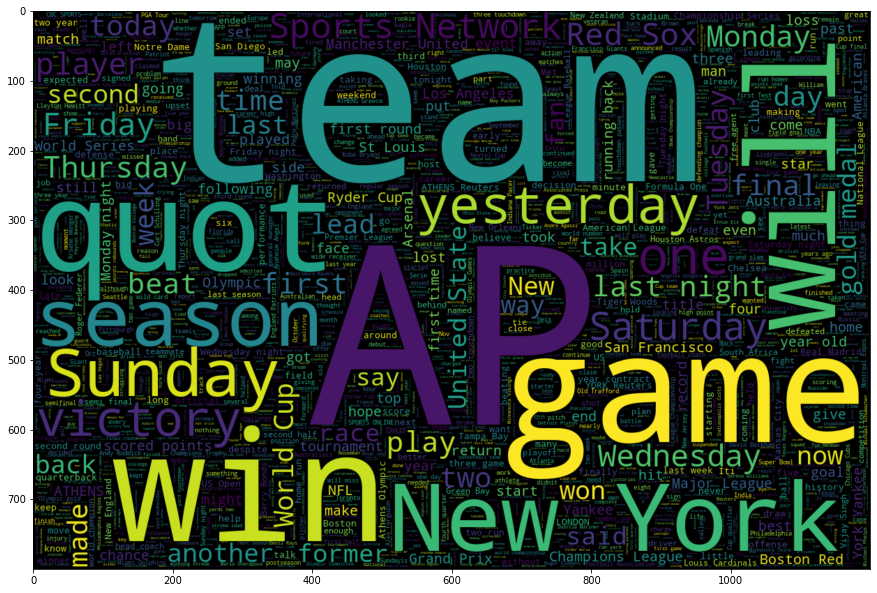

In [ ]:
#Wordcloud for Sports
sci = train.text[train.label_int[train.label_int==1].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear')

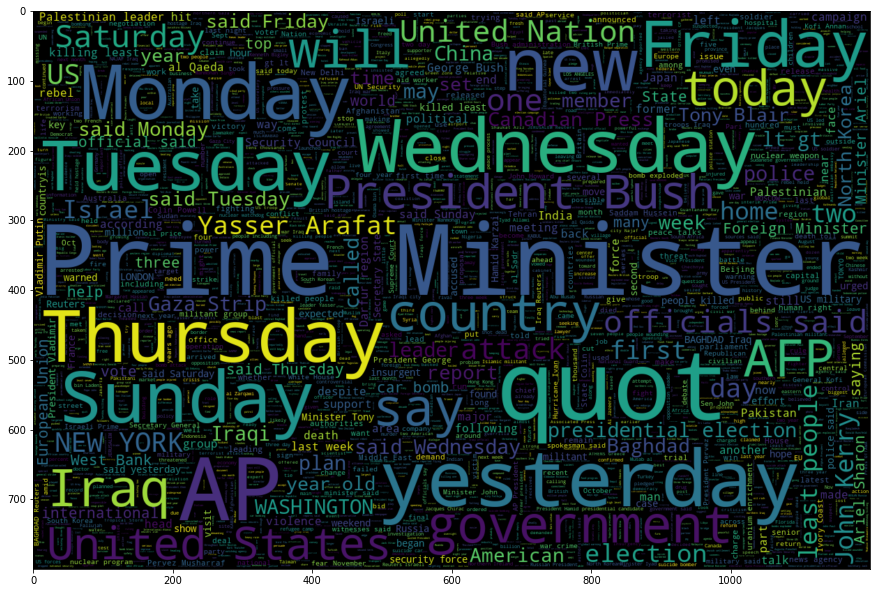

In [ ]:
#Wordcloud for World
sci = train.text[train.label_int[train.label_int==2].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear')

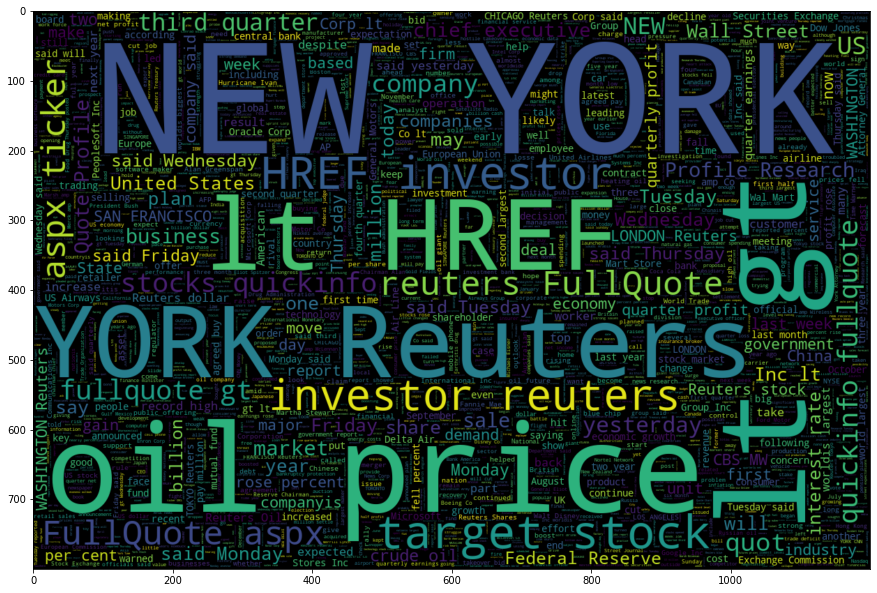

In [ ]:
#Wordcloud for Business
sci = train.text[train.label_int[train.label_int==3].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear')

# Feature Engineering

As seen in the training dataset above. The text in index 5 has a string `#39;` that is supposed to be just a `'`. Therefore we will replace it with the actual string.

In [ ]:
train['text'] = train['text'].str.replace(' #39;', "'")
test['text'] = test['text'].str.replace(' #39;', "'")

display(train[:10])

text  ... business_int
0  John Souza, a volunteer with the Boone County ...  ...            1
1  Spain needs only to beat an under-strength Fre...  ...            0
2  PANAMA CITY, Panama -- When the United States ...  ...            0
3  Gilbert Arenas, Jarvis Hayes and Anthony Peele...  ...            0
4  MEMPHIS, Tenn. -- Kobe Bryant had his worst sh...  ...            0
5  Delta Air Linesi decision to close its hub at ...  ...            1
6  An Anne Arundel County judge Wednesday  reject...  ...            0
7  JAKARTA A militant Muslim cleric was charged W...  ...            0
8  Thereis a reason that smiling Salvation Army b...  ...            1
9  A Palestinian rocket hit an Israeli town near ...  ...            0

[10 rows x 7 columns]

We can see how we have an even distribution among categories

# Naive Bayes Model



```
# This is formatted as code
```

We have created two Naive Bayes model, one is for  multinomial predictions, another for binary predictions. Therefore, we will create four different models, one for each category. 

In order to create the model, we have built a Pipeline of components: `vect`, `tfidf` and `clf`.

    - `vect` extracts a bag-of-words from the text column in our dataset.
    - `tfidf` assigns frequencies to the words, forming a feature vector of the text. 
    - `clf` is a machine learning algorithm that learns the model weights based on the training examples. 


These three components will help our model predict each of the categories in our datsaet.

###Multinomial

In [ ]:
agnews_naivebayes = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
    ])
agnews_naivebayes.fit(train.text, train.label_int)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
agnews_test_naivebayes = agnews_naivebayes.predict(test.text)

In [ ]:
diff = agnews_test_naivebayes == test.label_int

In [ ]:
Counter(diff)[True]/len(diff)

0.8952

In [ ]:
print(classification_report(test.label_int, 
                            agnews_test_naivebayes, 
                            target_names=['Science', 'Sports', 'World', 'Business']))

              precision    recall  f1-score   support

     Science       0.87      0.86      0.87      2537
      Sports       0.95      0.98      0.96      2458
       World       0.89      0.89      0.89      2509
    Business       0.87      0.86      0.86      2496

    accuracy                           0.90     10000
   macro avg       0.89      0.90      0.90     10000
weighted avg       0.89      0.90      0.89     10000



### Science

In [ ]:
science_naivebayes = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB())])
science_naivebayes.fit(train.text, train.science_int)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
science_naivebayes_pred = science_naivebayes.predict(test.text)

In [ ]:
print(classification_report(test.science_int, 
                            science_naivebayes_pred, 
                            target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.92      0.98      0.95      7463
    positive       0.91      0.76      0.83      2537

    accuracy                           0.92     10000
   macro avg       0.92      0.87      0.89     10000
weighted avg       0.92      0.92      0.92     10000



### Sports

In [ ]:
sports_naivebayes = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB())])
sports_naivebayes.fit(train.text, train.sports_int)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
sports_naivebayes_pred = sports_naivebayes.predict(test.text)

In [ ]:
print(classification_report(test.sports_int, 
                            sports_naivebayes_pred, 
                            target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.98      0.99      0.99      7542
    positive       0.97      0.94      0.95      2458

    accuracy                           0.98     10000
   macro avg       0.97      0.96      0.97     10000
weighted avg       0.98      0.98      0.98     10000



### World

In [ ]:
world_naivebayes = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB())])
world_naivebayes.fit(train.text, train.world_int)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
world_naivebayes_pred = world_naivebayes.predict(test.text)

In [ ]:
print(classification_report(test.world_int, 
                            world_naivebayes_pred, 
                            target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.94      0.98      0.96      7491
    positive       0.95      0.82      0.88      2509

    accuracy                           0.94     10000
   macro avg       0.94      0.90      0.92     10000
weighted avg       0.94      0.94      0.94     10000



### Business

In [ ]:
business_naivebayes = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB())])
business_naivebayes.fit(train.text, train.business_int)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
business_naivebayes_pred = business_naivebayes.predict(test.text)

In [ ]:
print(classification_report(test.business_int, 
                            business_naivebayes_pred, 
                            target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.92      0.97      0.95      7504
    positive       0.89      0.76      0.82      2496

    accuracy                           0.92     10000
   macro avg       0.91      0.87      0.88     10000
weighted avg       0.92      0.92      0.91     10000



# Stochastic Gradient Descent Model

As a comparison to the Naive Bayes Model, we also made a Stochastic Gradient Descent model. Similar to the NB model we also generated a Pipeline of components:  `vect`, `tfidf` and `clf`.

    - `vect` extracts a bag-of-words from the text column in our dataset.
    - `tfidf` assigns frequencies to the words, forming a feature vector of the text. 
    - `clf` is a machine learning algorithm that learns the model weights based on the training examples. But in this case rather than using Multinomial NB, we shall use SGDClassifier with hinge Loss, and a variable alpha depending on how fitted the data is 

These three components will help our model predict each of the categories in our dataset.


##SGD Models per Label

###Multinomial SGD

In [ ]:
lbl_int_sgd = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                              alpha=1e-5, random_state=42,
                              max_iter=100, tol=None)),
        ])
lbl_int_sgd.fit(train.text, train.label_int)

# eval
print(classification_report(test.label_int, 
                            lbl_int_sgd.predict(test.text), 
                            target_names=['Science', 'Sports', 'World','Business']))

###Science

In [ ]:
sci_int_sgd = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                              alpha=1e-5, random_state=42,
                              max_iter=100, tol=None)),
        ])
sci_int_sgd.fit(train.text, train.science_int)

# eval
print(classification_report(test.science_int, 
                            sci_int_sgd.predict(test.text), 
                            target_names=['Negative', 'Positive']))



              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96      7463
    Positive       0.90      0.86      0.88      2537

    accuracy                           0.94     10000
   macro avg       0.93      0.91      0.92     10000
weighted avg       0.94      0.94      0.94     10000



Accuracy Improved from 0.92 in NB to 0.94 in SGD. 

###Sports

In [ ]:
spo_int_sgd = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                              alpha=1e-5, random_state=42,
                              max_iter=100, tol=None)),
        ])
spo_int_sgd.fit(train.text, train.sports_int)

# eval
print(classification_report(test.sports_int, 
                            spo_int_sgd.predict(test.text), 
                            target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99      7542
    Positive       0.96      0.97      0.97      2458

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Accuracy stayed similar for both models, but the SGD increased the Positive class Precision, Recall, and F1 Score slightly.

### World

In [ ]:
wor_int_sgd = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                              alpha=1e-5, random_state=42,
                              max_iter=100, tol=None)),
        ])
wor_int_sgd.fit(train.text, train.world_int)

# eval
print(classification_report(test.world_int, 
                            wor_int_sgd.predict(test.text), 
                            target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.98      0.97      7491
    Positive       0.94      0.86      0.90      2509

    accuracy                           0.95     10000
   macro avg       0.95      0.92      0.93     10000
weighted avg       0.95      0.95      0.95     10000



Accuracy improved from 0.94(NB) to 0.95(SGD) and the precision, recall and f1 score for the Positive Class increased as well.

### World with different ngrams and alphas

In [ ]:
from sklearn.model_selection import GridSearchCV

#Define the sklearn pipeline
sgd_grid_estimator = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42, max_iter=100, tol=None)),
])

# this defines the configurations
sgd_grid_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
    'clf__alpha': (1e-3, 1e-6, 1e-9, 1e-12)
}

#Creating the SGD model
world_sgd_grid= GridSearchCV(sgd_grid_estimator, sgd_grid_parameters, verbose=1)

In [ ]:
#Training several models
world_sgd_grid.fit(train.text, train.world_int)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
 #Retrieving the best performing parameters and the classification report to evaluate the model
sgd_best = world_sgd_grid.best_estimator_
print('BEST PARAMS:', world_sgd_grid.best_params_)

print(classification_report(test.world_int, 
                            sgd_best.predict(test.text), 
                            target_names=['negative', 'positive']))

###Business

In [ ]:
bzn_int_sgd = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer(use_idf=True)),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                              alpha=1e-5, random_state=42,
                              max_iter=100, tol=None)),
        ])
bzn_int_sgd.fit(train.text, train.business_int)

# eval
print(classification_report(test.business_int, 
                            bzn_int_sgd.predict(test.text), 
                            target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96      7504
    Positive       0.90      0.85      0.87      2496

    accuracy                           0.94     10000
   macro avg       0.93      0.91      0.92     10000
weighted avg       0.94      0.94      0.94     10000



For business, the Accuracy score increased from 0.92 in NB to 0.94 using the SGD.As seen similarly in the Labels above, the SGD increased precision, recall and the f1 Score for the positive class.

### Overview on the SGD model's accuracies

In [ ]:
from sklearn.metrics import accuracy_score

#Science
pred = sci_int_sgd.predict(test.text)
a=round(accuracy_score(test.science_int, pred)*100,3)

#Sports
pred = spo_int_sgd.predict(test.text)
b=round(accuracy_score(test.sports_int, pred)*100,3)

#World
pred = wor_int_sgd.predict(test.text)
c=round(accuracy_score(test.world_int, pred)*100,3)

#World optimized
pred = world_sgd_grid.predict(test.text)
d=round(accuracy_score(test.world_int, pred)*100,3)

#Business
pred = bzn_int_sgd.predict(test.text)
e=round(accuracy_score(test.business_int, pred)*100,3)

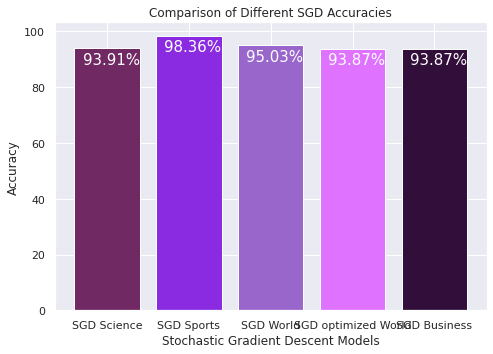

In [ ]:
#Graph to compare the 5 accuracies
import seaborn as sns

sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['SGD Science', 'SGD Sports', 'SGD World', 'SGD optimized World', 'SGD Business']
Accuracy=[a,b,c,d,e]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff','#320E3B']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=20, color='white')
plt.title('Comparison of Different SGD Accuracies');
plt.ylabel('Accuracy');
plt.xlabel('Stochastic Gradient Descent Models');

plt.show()

### Overview on the Naive Bayes model's accuracies

In [ ]:
#Science
pred = science_naivebayes.predict(test.text)
f=round(accuracy_score(test.science_int, pred)*100,3)

#Sports
pred = sports_naivebayes.predict(test.text)
g=round(accuracy_score(test.sports_int, pred)*100,3)

#World
pred = world_naivebayes.predict(test.text)
h=round(accuracy_score(test.world_int, pred)*100,3)

#Business
pred = business_naivebayes.predict(test.text)
i=round(accuracy_score(test.business_int, pred)*100,3)

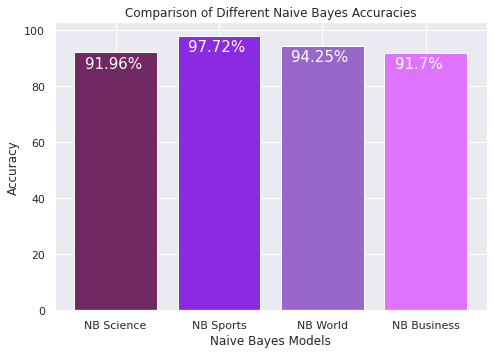

In [ ]:
#Graph to compare the 4 accuracies

sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['NB Science', 'NB Sports', 'NB World', 'NB Business']
Accuracy=[f,g,h,i]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Naive Bayes Accuracies');
plt.ylabel('Accuracy');
plt.xlabel('Naive Bayes Models');

plt.show()

## SGD Evaluation compared to Naive Bayes

### Prediction Capability Evaluation

Using the SGD Evaluation instead of the Naive Bayes while evaluating the classifiers improves the prediction capability of the Model. By reducing the Alpha to 1e-5 instead of 1e-6, the generalisation of the model improves its accuracy, thus being better fitted to the dataset compared to the Naives Bayes Model. 

### Weight Inspection of the SGD Model

As seen below, for each label, these 10 words are most likely to determine what type of label the article is about. For example, articles which mention the military, countries in the middle east, terrorism or elections are mos tlikely to be classified as world articles.

#### Function to determine the feature weights

In [ ]:
def sort_feature_weights(sk_pipe, fkey='vect', wkey='clf'):
    F = sk_pipe[fkey].get_feature_names()
    W = sk_pipe[wkey].coef_[0]
    return sorted(zip(F, W), key=lambda fw: fw[1])

In [ ]:
sci_int_sgd_weights = sort_feature_weights(sci_int_sgd)
spo_int_sgd_weights = sort_feature_weights(spo_int_sgd)
wor_int_sgd_weights= sort_feature_weights(wor_int_sgd)
bzn_int_sgd_weights = sort_feature_weights(bzn_int_sgd)

#### Word Correlation for Science Articles

In [ ]:
n=10
print('words most correlated with Positive for Science Articles:')
sci_int_sgd_weights[-n:]

#### Word Correlation for Sports Articles

In [ ]:
n=10
print('words most correlated with Positive for Sports Articles:')
spo_int_sgd_weights[-n:]

#### Word Correlation for World Articles

In [ ]:
n=10
print('words most correlated with Positive for World Articles:')
wor_int_sgd_weights[-n:]

#### Word Correlation for Business Articles

In [ ]:
n=10
print('words most correlated with Positive for Business Articles:')
bzn_int_sgd_weights[-n:]

### Prediction Score Breakdown



```
prediction_score_breakdown(spo_int_sgd,"Chicago Cubs Wins World Series")
```

This prediction_score_breakdown function would demonstrate how the model weights each word using the Sports_integer classifier. In this case, the example sentence "Chicago Cubs Wins the World Series" correleated positively with the function, demonstrating that this theoretical headline is most likely related to a sports article.

#### Prediction Score function

In [ ]:
def prediction_score_breakdown(sk_model, text):
    """Computes the prediction score for a text, breaking down into the individual scores for each word of the text."""
    X = [text]
    for step_name, model in sk_model.steps[:-1]:
        X = model.transform(X)
    nzrows, nzcolumns = X.nonzero()
    
    F = sk_model.steps[0][1].get_feature_names()
    W = sk_model.steps[-1][1].coef_[0]
    bias = sk_model.steps[-1][1].intercept_[0]
    total_score = bias
    print('prediction_score={:.3f}   bias={}'.format(total_score, bias))
    for i,j in zip(nzrows, nzcolumns):
        f = F[j]
        v = X[i,j]
        w = W[j]
        s = w*v
        total_score += s
        print('prediction_score={:.3f}   fdim={:5d}, fword="{:s}", value={:.4f}, weight={:.4f}, score={:.4f}'.format(total_score, j, f, v, w, s))
    return total_score

prediction_score_breakdown(spo_int_sgd,"Chicago Cubs Wins World Series")

# Optional 3: Threshold Tuning



To better fine tune the classifiers towards Precision and Recall, we are going to alter the thresholds such that we can achieve classifiers with perfect recall or perfect precision. 

##Tuning Functions

### SkLearn pipeline for Tuning


In [ ]:
# this defines the base sklearn pipeline we want to tune
sgd_grid_estimator = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42, max_iter=20, tol=None)),
])

# this defines the configurations. For simplification purposes vect_negram_range was reduced from 3 to 2 pairs
sgd_grid_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': (1e-3, 1e-6,)
}

# we create 4 Grids, 1 per label
sgd_grid_sci = GridSearchCV(sgd_grid_estimator, sgd_grid_parameters, verbose=1)
sgd_grid_spo = GridSearchCV(sgd_grid_estimator, sgd_grid_parameters, verbose=1)
sgd_grid_wor = GridSearchCV(sgd_grid_estimator, sgd_grid_parameters, verbose=1)
sgd_grid_bzn = GridSearchCV(sgd_grid_estimator, sgd_grid_parameters, verbose=1)

### Threshold tuning for Science

In [ ]:
#Creating SGD Grid and best estimator for Science_int
sgd_grid_sci.fit(train.text, train.science_int)
sgd_best_sci = sgd_grid_sci.best_estimator_

In [ ]:
#the scores are computed once the model is fit
test_scores_sci = sgd_best_sci.decision_function(test.text)

# and afterwards we can alter the threshold
for threshold in [-2, -1, 0, 1, 2]:
    print("Metrics with threshold={}".format(threshold))
    print(classification_report(test.science_int, 
                               [1 if s>threshold else 0 for s in test_scores_sci], 
                               target_names=['negative', 'positive']))
    print()

### Threshold tuning for Sports

In [ ]:
sgd_grid_spo.fit(train.text, train.sports_int)
sgd_best_spo = sgd_grid_spo.best_estimator_

In [ ]:
#the scores are computed once the model is fit
test_scores_spo = sgd_best_spo.decision_function(test.text)

# and afterwards we can alter the threshold
for threshold in [-2, -1, 0, 1, 2]:
    print("Metrics with threshold={}".format(threshold))
    print(classification_report(test.sports_int, 
                               [1 if s>threshold else 0 for s in test_scores_spo], 
                               target_names=['negative', 'positive']))
    print()

###Threshold Tuning for World


In [ ]:
sgd_grid_wor.fit(train.text, train.world_int)
sgd_best_wor = sgd_grid_wor.best_estimator_

In [ ]:
#the scores are computed once the model is fit
test_scores_wor = sgd_best_wor.decision_function(test.text)

# and afterwards we can alter the threshold
for threshold in [-2, -1, 0, 1, 2]:
    print("Metrics with threshold={}".format(threshold))
    print(classification_report(test.world_int, 
                               [1 if s>threshold else 0 for s in test_scores_wor], 
                               target_names=['negative', 'positive']))
    print()

###Threshold Tuning for Business

In [ ]:
#Creating SGD Grid and best  for Science_int
sgd_grid_sci.fit(train.text, train.science_int)
sgd_best_sci = sgd_grid_sci.best_estimator_

In [ ]:
#the scores are computed once the model is fit
test_scores_bzn = sgd_best_bzn.decision_function(test.text)

# and afterwards we can alter the threshold
for threshold in [-2, -1, 0, 1, 2]:
    print("Metrics with threshold={}".format(threshold))
    print(classification_report(test.business_int, 
                               [1 if s>threshold else 0 for s in test_scores_bzn], 
                               target_names=['negative', 'positive']))
    print()

In [ ]:
#Creating SGD Grid and best  for Business_int
sgd_grid_bzn.fit(train.text, train.business_int)
sgd_best_bzn = sgd_grid_bzn.best_estimator_

In [ ]:
#Creating SGD Grid and best  for Sports_int
sgd_grid_spo.fit(train.text, train.sports_int)
sgd_best_spo = sgd_grid_spo.best_estimator_

In [ ]:
#Creating SGD Grid and best  for World_int
sgd_grid_wor.fit(train.text, train.world_int)
sgd_best_wor = sgd_grid_wor.best_estimator_

## Threshold Tuning Evaluation

Tuning Evaluation

Achieving True Precision or True Recall for a classifier comes at the expense of the Recall and Precision rate of the other classifiers. Taking into account the SGD NLP Model for the Science Integer for example: Putting the metrics with threshold -2 will change the Precision rate for the negative class to 1.00 and the Recall rate for the Positive class at 1.00.

What this means is that the NLP model will, with 100% certainty, be able to determine a Science Article from an Article that may have words related to science but are not Science based at all. However this comes at a cost of a low recall rate, and so there may be articles that are Science based but since they don’t use the right words, the model may reject them and thus be classified as a “False Negative”

In the case of the Positive class, the Model has a Positive Class Recall rate of 1.00 which means the model can correctly identify which articles have words relating to “Science” however it comes at a cost of a low precision rate. So in this case, the model has a hard time figuring out which articles are truly “Science” articles and those that are articles about other topics but with numerous Science words written in them.

The same can be said for the other labels albeit at slightly different thresholds. 

The advantage of having Classifiers with True Precision is that it allows the model to be used in cases where the researcher wants certainty that the Articles that are returned to him are absolutely what they wanted to search for. Thus saving time in having to read through the articles to determine if they are relevant to them.

The advantage of having Classifiers with True Recall is that it allows the model to be used in cases where the researcher may not be concerned of the relevancy of the articles but at the span and scope of the articles in general. In cases such as in articles pertaining to “World Affairs” maybe the researcher would be interested in articles about Spain, but not necessarily just under the classifier “World” but also under “Science, Business and Sport”. 



# Optional 4: Analysis on learned ngram weights

In [ ]:
sci_best_weights = sort_feature_weights(sgd_best_sci)
spo_best_weights = sort_feature_weights(sgd_best_spo)
wor_best_weights= sort_feature_weights(sgd_best_wor)
bzn_best_weights = sort_feature_weights(sgd_best_bzn)

NameError: ignored

## Positive Weights

In [ ]:
n=10
print('words most correlated with Positive for Science Articles:')
sci_best_weights[-n:]

It seems that the words most associated with positive science articles can be divided into 2 broad categories:
- Firstly, there are the names of news publishers and scientific institutions (i.e. Washington Post, Washington Post.com, Reuters, NASA, AP (Associated Press) and Apple). It seems thus that these news publishers are optimistic about science and that the accomplishments of NASA and Apple are positively regarded.
- Second, there are specific computer/science terms (i.e. linux, software, internet and space). It seems thus that articles about computer science and space and positively talked about.

In summary the words most associated with positive science articles are the names of specific news publishers, space-related topics and computer-related topics.

In [ ]:
n=10
print('words most correlated with Positive for Sports Articles:')
spo_best_weights[-n:]

It seems that the words most associated with positive sports articles are exactly what one would expect: the names of popular sports (i.e. cricket, baseball and football) and general sports-related terms (i.e. olympic, teams, team, cup, coach...).

In [ ]:
n=10
print('words most correlated with Positive for World Articles:')
wor_best_weights[-n:]

It seems that the words most associated with positive science articles can be divided into 2 broad categories:
- Firstly, there are terms that we would expect to have a positive connotation: names of locations (i.e. Athens, Tokyo, New York...) and names of (presumably qualitative) world news publishers (i.e. AFP, Canadian Press...).
- Second, there are terms that are quite surprising to have a positive connotation such as 'military', 'nuclear' and names of locations with ongoing unrest (i.e. Iraq and Palestine). One possible explanation for this discrepancy is that the articles that were used for training are in favor of the reasons behind the public unrest in these places (i.e. maybe a lot of articles were pro-palestine).

In [ ]:
n=10
print('words most correlated with Positive for Business Articles:')
bzn_best_weights[-n:]

It seems that the words most associated with positive sports articles are exactly what one would expect: the names of well-regarded organizations that report on financial topics (i.e. Forbes and Reuters) and general finance terms (i.e. economy, bank, tax...).

Altough it should be noted that it is surprising that Enron has a positive connotation since this company is mainly known for one of the largest fraud scandals in recent history.

## Negative Weights

In [ ]:
n=10
print('words most correlated with Negative for Science Articles:')
sci_best_weights[:n]

words most correlated with Negative for Science Articles:


NameError: ignored

It seems that the words most associated with negative science articles are not at all what one would expect since a lot of terms are at best loosely related with science (i.e. stocks, yesterday, 19pm, SBC (a sports betting company), fullquote...). 

Although we can deduce that likely Reuters and Canadian Press tend to publish negative science articles (as opposed to for example Washington Post and AP). 

In [ ]:
n=10
print('words most correlated with Negative for Sports Articles:')
spo_best_weights[:n]

Again, a lot of terms associated with negative sports articles have little to do with sports (i.e. microsoft, computer, scientists, space, technology...).

Although we can deduce that Athens (the locations of the 2004 olympics) has a strong negative connotation and also when a sports article talks about a president (presumably a president of a sports team) or about a company, it has a negative connotation. This makes sense, since you would only expect sports articles to talk about a club's president when he/she did something wrong or to talk about a company when there is a club takeover or a major investment.

In [ ]:
n=10
print('words most correlated with Negative for World Articles:')
wor_best_weights[:n]

Again, a lot of terms associated with negative world articles have little to do with world news (i.e. microsoft, software, cup, online, space...).

Although we can deduce that Reuters likely publishes mainly negative world news.

In [ ]:
n=10
print('words most correlated with Negative for Business Articles:')
bzn_best_weights[:n]

As for the terms most associated with negative business articles, we mainly find the names of news publishers (i.e. Washington Post, Canadian Press, Reuters, AFP (Agence France-Presse), AP...) that presumably mainly publish negative articles about business-related news.

# Optional 6: Spacy Tagging

In order to use the Spacy library, we need to load the english package, since all of our texts are written in English.

In [ ]:
nlp = spacy.load('en_core_web_sm')

Link to the meaning of each tag: https://github.com/explosion/spaCy/blob/master/spacy/glossary.py

We are now going to find the tags used in every single category to find which ones were the most used. in order to do this we will use Spacy to use tokenization 

This way, we will be able to assign a tag to each word describing what it is (word, verb, adjective, article, etc.)

## Science Tags

In [ ]:
# We select the text that corresponds to the science category
science_text = test.text[test['science_int'] == 1]

science_nlp = [nlp(sentence) for sentence in science_text]

In [ ]:
# We look for the tag and word and append them in a dictionary
science_tags = []
science_words = []
for sentence in science_nlp:
    for word in sentence:
        science_tags.append(word.tag_)
        science_words.append(word)

In [ ]:
# We count the number of words in each tag
count_science_tags = dict(Counter(science_tags))
print(count_science_tags)

{'PRP': 1046, 'VBZ': 2202, 'RB': 2037, '.': 3029, 'PRP$': 1005, 'NN': 14541, 'VBN': 2166, 'VBG': 2038, 'IN': 9344, 'DT': 6888, ',': 3270, 'CC': 1911, 'VBP': 1099, 'NNP': 11347, 'VBD': 1698, 'CD': 1826, '-LRB-': 414, '-RRB-': 414, 'JJ': 5715, 'WDT': 532, 'MD': 856, 'VB': 2647, 'RP': 395, 'JJR': 327, 'NNS': 5636, 'HYPH': 1461, 'WP': 164, '_SP': 526, ':': 842, 'POS': 764, 'TO': 1392, '$': 78, 'WRB': 169, 'NNPS': 312, 'RBR': 124, 'FW': 15, '``': 149, "''": 146, 'JJS': 217, 'ADD': 61, 'RBS': 72, 'EX': 42, 'NFP': 29, 'UH': 44, 'SYM': 183, 'PDT': 40, 'WP$': 8, 'LS': 4, 'XX': 2}


## Sports Tags

In [ ]:
# We select the text that corresponds to the sports category
sports_text = test.text[test['sports_int'] == 1]

sports_nlp = [nlp(sentence) for sentence in sports_text]

In [ ]:
# We look for the tag and word and append them in a dictionary
sports_tags = []
sports_words = []
for sentence in sports_nlp:
    for word in sentence:
        sports_tags.append(word.tag_)
        sports_words.append(word)

In [ ]:
# We count the number of words in each tag
count_sports_tags = dict(Counter(sports_tags))
print(count_sports_tags)

{'CD': 3705, 'NNS': 2965, 'IN': 9751, 'PRP': 1234, 'VBD': 3134, 'PRP$': 1144, 'JJ': 4412, 'NN': 11567, 'RB': 2017, 'DT': 7869, ',': 2807, 'NNP': 16695, '.': 3046, ':': 890, 'VBZ': 1215, 'VBN': 1494, 'WRB': 274, 'NNPS': 1224, 'VBP': 558, 'CC': 1504, 'POS': 1022, 'JJS': 165, 'TO': 1055, 'VB': 1988, 'RP': 393, 'WP': 204, 'HYPH': 1228, 'WDT': 205, '-RRB-': 408, 'VBG': 1542, 'SYM': 642, '``': 25, "''": 47, '-LRB-': 404, 'JJR': 156, 'MD': 652, '_SP': 615, 'PDT': 26, 'FW': 9, 'RBS': 53, 'RBR': 67, 'UH': 32, 'EX': 54, 'NFP': 7, '$': 21, 'ADD': 1, 'LS': 3, 'WP$': 10}


## World Tags

In [ ]:
# We select the text that corresponds to the world category
world_text = test.text[test['world_int'] == 1]

world_nlp = [nlp(sentence) for sentence in world_text]

In [ ]:
# We look for the tag and word and append them in a dictionary
world_tags = []
world_words = []
for sentence in world_nlp:
    for word in sentence:
        world_tags.append(word.tag_)
        world_words.append(word)

In [ ]:
# We count the number of words in each tag
count_world_tags = dict(Counter(world_tags))
print(count_world_tags)

{'NNP': 13863, ',': 2973, 'CD': 1925, ':': 911, 'JJ': 6498, 'VBD': 3571, 'NNS': 5543, 'IN': 10849, 'VBG': 1930, 'DT': 7430, 'NN': 12531, 'WRB': 160, 'PRP': 769, '.': 2651, 'HYPH': 1428, 'VBN': 2416, 'PRP$': 914, 'POS': 989, 'TO': 1313, 'VB': 2019, "''": 117, 'CC': 1673, 'VBZ': 1205, '_SP': 988, '-LRB-': 372, '-RRB-': 371, '``': 97, 'MD': 533, 'RB': 1429, 'VBP': 652, 'RP': 301, 'NNPS': 337, 'SYM': 46, 'JJS': 202, 'UH': 5, 'WP': 217, 'JJR': 208, 'WDT': 325, 'EX': 33, 'RBR': 65, 'RBS': 138, 'WP$': 21, '$': 44, 'PDT': 18, 'FW': 6, 'ADD': 7, 'NFP': 32}


## Business Tags

In [ ]:
# We select the text that corresponds to the business category
business_text = test.text[test['business_int'] == 1]

business_nlp = [nlp(sentence) for sentence in business_text]

In [ ]:
# We look for the tag and word and append them in a dictionary
business_tags = []
business_words = []
for sentence in business_nlp:
    for word in sentence:
        business_tags.append(word.tag_)
        business_words.append(word)

In [ ]:
# We count the number of words in each tag
count_business_tags = dict(Counter(business_tags))
print(count_business_tags)

{'NNP': 14118, 'MD': 664, 'VB': 2126, 'HYPH': 1292, 'CD': 2202, 'NN': 14299, 'IN': 10128, 'DT': 6285, ',': 3095, 'CC': 1795, 'VBZ': 1297, 'TO': 1251, 'VBG': 1671, 'NNPS': 387, 'JJ': 5267, '.': 2545, '_SP': 1784, '-LRB-': 819, '-RRB-': 800, ':': 1222, 'SYM': 678, 'VBD': 3112, 'PRP': 805, 'NNS': 5529, 'RB': 1534, 'PRP$': 1122, 'RP': 314, 'JJR': 430, 'VBN': 1621, 'WP': 92, 'VBP': 500, 'WDT': 327, 'JJS': 349, 'POS': 935, 'WRB': 94, 'UH': 110, '``': 51, "''": 57, 'PDT': 18, '$': 28, 'RBR': 117, 'RBS': 39, 'EX': 21, 'WP$': 7, 'XX': 7, 'ADD': 14, 'FW': 9, 'NFP': 4}


## Combined DataFrame

Once we have the tags for all the categories present in our dataset, we will create a graph in order to visualize how the text is structured in every single category.

First we will need to add our dictionaries that we have just created into a DataFrame.

In [ ]:
category = pd.DataFrame({'Categories':['Science', 'Sports', 'World', 'Business']})

# Creatign a dataframe with all the tags found in the four categories.
tags = pd.DataFrame(data = count_science_tags, index=[1])
tags = tags.append(count_sports_tags, ignore_index = True)
tags = tags.append(count_world_tags, ignore_index = True)
tags = tags.append(count_business_tags, ignore_index = True)

# Transforming the column 'Categories' to become the index.
tags = category.join(tags)
tags = tags.fillna(0)
tags = tags.set_index('Categories')

tags

PRP     VBZ      RB       .    PRP$  ...    SYM   PDT   WP$   LS   XX
Categories                                          ...                             
Science     1046.0  2202.0  2037.0  3029.0  1005.0  ...  183.0  40.0   8.0  4.0  2.0
Sports      1234.0  1215.0  2017.0  3046.0  1144.0  ...  642.0  26.0  10.0  3.0  0.0
World        769.0  1205.0  1429.0  2651.0   914.0  ...   46.0  18.0  21.0  0.0  0.0
Business     805.0  1297.0  1534.0  2545.0  1122.0  ...  678.0  18.0   7.0  0.0  7.0

[4 rows x 49 columns]

Once we have the DataFrame, we will go ahead and delete all unnecessary strings or words such as punctuations. 

In [ ]:
# Finding all columns that represent punctuations, since it will not be useful for the analysis.
tags.columns

Index(['PRP', 'VBZ', 'RB', '.', 'PRP$', 'NN', 'VBN', 'VBG', 'IN', 'DT', ',',
       'CC', 'VBP', 'NNP', 'VBD', 'CD', '-LRB-', '-RRB-', 'JJ', 'WDT', 'MD',
       'VB', 'RP', 'JJR', 'NNS', 'HYPH', 'WP', '_SP', ':', 'POS', 'TO', '$',
       'WRB', 'NNPS', 'RBR', 'FW', '``', '''', 'JJS', 'ADD', 'RBS', 'EX',
       'NFP', 'UH', 'SYM', 'PDT', 'WP$', 'LS', 'XX'],
      dtype='object')

In [ ]:
# Deleting the columns that represent punctuation marks from the texts. 
columns_delete = ['.', ',', ':', "''", '``']
tags = tags.drop(columns_delete, axis = 1)

tags

PRP     VBZ      RB    PRP$  ...   PDT   WP$   LS   XX
Categories                                  ...                      
Science     1046.0  2202.0  2037.0  1005.0  ...  40.0   8.0  4.0  2.0
Sports      1234.0  1215.0  2017.0  1144.0  ...  26.0  10.0  3.0  0.0
World        769.0  1205.0  1429.0   914.0  ...  18.0  21.0  0.0  0.0
Business     805.0  1297.0  1534.0  1122.0  ...  18.0   7.0  0.0  7.0

[4 rows x 44 columns]

Once the punctuations and usless strings have been deleted, we will create a dataframe with the Top 5 most used tags in each category to later on visualize them in a bar chart.

In [ ]:
# Creating a DataFrame to find the top 5 tags for each Category.
top_5 = pd.DataFrame(tags.columns.values[np.argsort(-tags.values, axis=1)[:, :5]], 
                  index=tags.index,
                  columns = ['Top 1','Top 2','Top 3', 'Top 4', 'Top 5']).reset_index()
top_5

Categories Top 1 Top 2 Top 3 Top 4 Top 5
0    Science    NN   NNP    IN    DT    JJ
1     Sports   NNP    NN    IN    DT    JJ
2      World   NNP    NN    IN    DT    JJ
3   Business    NN   NNP    IN    DT   NNS

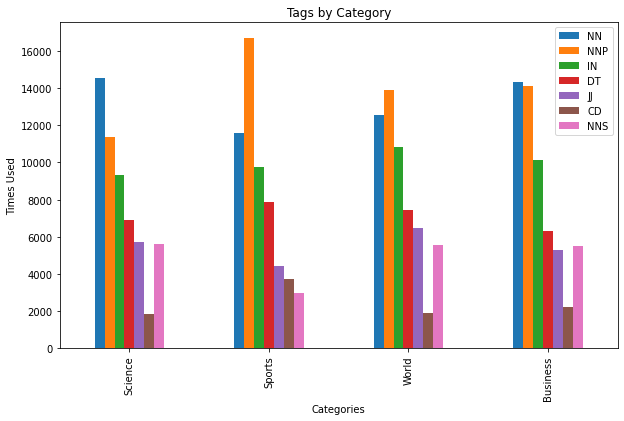

In [ ]:
# Sample DataFrame from the 5 most used tags. Created for the barplot.
tags_bar = tags[['NN', 'NNP', 'IN', 'DT', 'JJ', 'CD', 'NNS']]

# We create a bar plot with the top 5 tags per Category.
tags_bar.plot(kind='bar', figsize = (10,6))

plt.title("Tags by Category")
plt.xlabel("Categories")
plt.ylabel("Times Used")
plt.legend(loc='upper right')

    - NN = "noun, singular or mass"
    - NNP = "noun, proper singular"
    - IN = "conjunction, subordinating or preposition"
    - DT = "determiner"
    - JJ = "adjective"
    - CD = "cardinal number"
    - NNS = "noun, plural"

# Spacy Entities

A named entity is a “real-world object” that’s assigned a name – for example, a person, a country, a product or a book title. spaCy can recognize various types of named entities in a document, by asking the model for a prediction.

We will use this information to find the key words in every text and see how these vary depending on the category. 

## Science Entities

In [ ]:
# We create a dictionary with a pair of Entity and Label for each one found in the dataset
science_entity = {}

for sentence in science_nlp:
    for e in sentence.ents:
        science_entity[e] = e.label_  

In [ ]:
# We will now group all the words by Entity
science_entity_groupped = {}

for key, value in sorted(science_entity.items()):
    science_entity_groupped.setdefault(value, []).append(key)

In [ ]:
# We will format the data to find the amount of words in each Entity to be able to create a graphic with
science_length = [len(value) for key, value in science_entity_groupped.items()]
science_keys = [key for key, value in science_entity_groupped.items()]

## Sports Entities

In [ ]:
# We create a dictionary with a pair of Entity and Label for each one found in the dataset
sports_entity = {}

for sentence in sports_nlp:
    for e in sentence.ents:
        sports_entity[e] = e.label_  

In [ ]:
# We will now group all the words by Entity
sports_entity_groupped = {}

for key, value in sorted(sports_entity.items()):
    sports_entity_groupped.setdefault(value, []).append(key)

In [ ]:
# We will format the data to find the amount of words in each Entity to be able to create a graphic with
sports_length = [len(value) for key, value in sports_entity_groupped.items()]
sports_keys = [key for key, value in sports_entity_groupped.items()]

## World Entities

In [ ]:
# We create a dictionary with a pair of Entity and Label for each one found in the dataset
world_entity = {}

for sentence in world_nlp:
    for e in sentence.ents:
        world_entity[e] = e.label_  

In [ ]:
# We will now group all the words by Entity
world_entity_groupped = {}

for key, value in sorted(world_entity.items()):
    world_entity_groupped.setdefault(value, []).append(key)

In [ ]:
# We will format the data to find the amount of words in each Entity to be able to create a graphic with
world_length = [len(value) for key, value in world_entity_groupped.items()]
world_keys = [key for key, value in world_entity_groupped.items()]

## Business Entities

In [ ]:
# We create a dictionary with a pair of Entity and Label for each one found in the dataset
business_entity = {}

for sentence in business_nlp:
    for e in sentence.ents:
        business_entity[e] = e.label_  

In [ ]:
# We will now group all the words by Entity
business_entity_groupped = {}

for key, value in sorted(business_entity.items()):
    business_entity_groupped.setdefault(value, []).append(key)

In [ ]:
# We will format the data to find the amount of words in each Entity to be able to create a graphic with
business_length = [len(value) for key, value in business_entity_groupped.items()]
business_keys = [key for key, value in business_entity_groupped.items()]

## Combined Entities Bar Chart

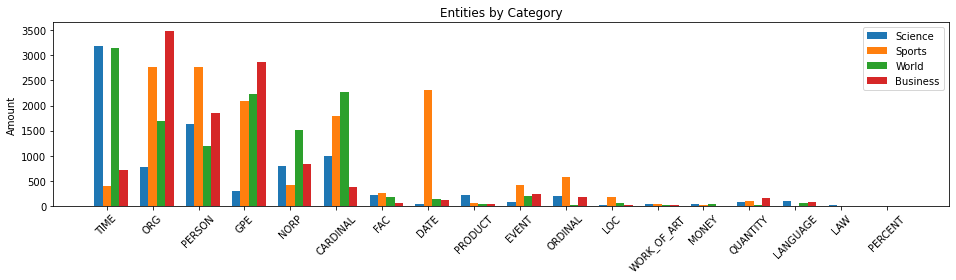

In [ ]:
width = 0.55  # the width of the bars
r0 = np.arange(len(sports_keys))  # the label locations
r1 = np.arange(0, len(sports_keys),1)
r1 = np.arange(0, len(sports_keys)*3,3)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]


fig, ax = plt.subplots(figsize = plt.figaspect(0.299))
science = ax.bar(r1, science_length, width, label='Science')
sports = ax.bar(r2, sports_length, width, label='Sports')
world = ax.bar(r3, world_length, width, label='World')
business = ax.bar(r4, business_length, width, label='Business')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_title('Entities by Category')
ax.set_xticks([r + width for r in range(0,len(sports_keys)*3,3)])
ax.set_xticklabels(sports_keys)
plt.xticks(rotation=45)
ax.legend()


fig.tight_layout()

plt.show()

In this graph we can see the entity distribution for the four categories. As mentioned in the summary, there are clear differences among the four topics with entities like TIME, ORG and DATE. 

Legend for the entities:

        - ORG -> Companies, agencies, institutions.
        - GPE -> Geopolitical entity, i.e. countries, cities, states.
        - FAC -> Buildings, airports, highways, bridges, etc.
        - NORP -> Nationalities or religious or political groups
      